### Importing Necessary Libraries

To begin the exploratory data analysis (EDA), we first import the essential libraries and modules required for analyzing and visualizing the data. This includes:

- **Pandas** and **NumPy** for data manipulation and numerical computations.
- **Matplotlib** for creating visualizations.
- **NLTK** and **TextBlob** for natural language processing tasks, such as sentiment analysis and text classification.
- **WordCloud** for generating word clouds to visualize the most frequent words in the text data.

Additionally, we download the necessary NLTK resources like `stopwords` and `punkt` to process the text data effectively.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from statsmodels.tsa.stattools import adfuller
from textblob.classifiers import NaiveBayesClassifier
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Exploring the Historical Stock Price Data**
To begin the exploratory data analysis, we load the historical stock price dataset and perform an initial examination of its structure and quality. This step ensures that we understand the dataset's composition and identify potential issues such as missing or duplicate values.

**Steps:**
1. Load the historical stock price data.
2. Display the first few rows to understand its structure.
3. Generate statistical summaries of the numerical columns to understand their distributions.
4. Check for missing values across all columns.
5. Identify and eliminate duplicate rows if any exist.
6. Summarize the cleaned dataset for further analysis.

---

#### **Key Observations**
After running the above code block, we found the following:
1. **Missing Values**: The dataset does not contain missing values, ensuring completeness.
2. **Duplicate Rows**: No duplicate rows were found, so no rows were removed.
3. **Dataset Structure**: The dataset contains information about stock prices such as `Open`, `Close`, `High`, `Low`, and `Volume`.
4. **Incorrect Data Type:** The data type of the `Date` column isn't a date, but an object. This will require changing for better visualizations.

---

#### **Conclusions**
The dataset is clean and ready for further exploration. With no missing or duplicate values, we can proceed.

In [4]:
historical_data = pd.read_csv('../data/stock_yfinance_data.csv')
historical_data.head()
historical_data.describe()
missing_values = historical_data.isnull().sum()
print(f"Missing Values in Each Column:\n{missing_values}")
duplicate_values = historical_data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_values}")
historical_data.info()

Missing Values in Each Column:
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Stock Name    0
dtype: int64
Number of Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6300 non-null   object 
 1   Open        6300 non-null   float64
 2   High        6300 non-null   float64
 3   Low         6300 non-null   float64
 4   Close       6300 non-null   float64
 5   Adj Close   6300 non-null   float64
 6   Volume      6300 non-null   int64  
 7   Stock Name  6300 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 393.9+ KB


### Checking Stationarity of Stock Prices for ARIMA Modeling

In this block, we test whether the adjusted closing prices for a selected stock are stationary. Stationarity is a key assumption for ARIMA modeling, as the model performs best on data with constant mean and variance over time. If the data is non-stationary, we'll address it during preprocessing to ensure compatibility with ARIMA.

#### **Steps in this Block**
1. **Select a Stock**: 
   - The `stock_name` and `company_name` variables are used to filter the dataset for a specific stock. 
   - In this example, the stock symbol is `TSLA` for **Tesla**.
   - `stock_name` and `company_name` must be replaced to analyze a different stock.

2. **Perform the Augmented Dickey-Fuller (ADF) Test**:
   - The ADF test is applied to the `Adj Close` column of the selected stock's data.
   - It calculates the **ADF statistic**, **p-value**, and **critical values** to assess stationarity.
   - If the p-value is less than 0.05, the data is stationary.

3. **Summarize Results**:
   - The results of the ADF test are stored in a dictionary, `adf_result_summary`, which indicates whether the data is stationary based on the p-value.

#### **Key Observations**
- The test checks if Tesla's adjusted closing prices are stationary.
- The output includes:
  - **ADF Statistic**: The test statistic calculated.
  - **p-value**: A measure to determine stationarity. If `p-value < 0.05`, the data is stationary.
  - **Critical Values**: Thresholds for stationarity at different confidence levels (1%, 5%, 10%).
  - **Stationary**: A Boolean indicating if the data meets the stationarity requirement.

#### **Next Steps**
If the data is found to be non-stationary (p-value > 0.05), we will apply techniques like differencing in the [model execution](model_execution.ipynb) to make it stationary, ensuring it is ready for ARIMA modeling.

Furthermore, the dataset lacks technical indicators such as moving averages and bollinger bands, which if added could add value to the dataset. These indicators have been added in the [data preprocessing](data_preprocessing.ipynb)


In [ ]:
stock_name = 'TSLA'
company_name = 'Tesla'
df_stock = historical_data[historical_data['Stock Name'] == stock_name]

adf_result = adfuller(df_stock['Adj Close'])
adf_result_summary = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4],
    'Stationary': adf_result[1] < 0.05  # p-value < 0.05 indicates stationarity
}
print(f'Stationary Data: {adf_result[1] <= 0.05}')

### **Exploring the Tweets Dataset**

In this section, we examine the dataset containing tweets related to stock performance. Understanding the structure and distribution of these tweets is essential before performing sentiment analysis and integrating them into stock price forecasting models.

---

#### **Steps in this Block**
1. **Load the Tweets Dataset**:  
   The `tweets.csv` file is loaded into the `all_tweets` DataFrame. This dataset contains the text of tweets related to stocks, which we will preprocess and analyze.

2. **Check Basic Information and Summary Statistics**:
   - We use `info()` to get a summary of the dataset, including the number of entries, column names, and data types.
   - `describe()` gives a summary of statistical features such as the count, mean, standard deviation, and distribution of the data.

---

#### **Key Observations from the Output**:
- **Dataset Overview**:  
  - There are no missing values in the data, as observed from the `info()` output.
  - Much like the dataset containing historical data, the `Date` column has the data type of an object instead of a date. This must also be changed to allow visualizations and to span the dates.
 - Most tweets are about the company Tesla (37,422 / 80,793)



In [10]:
all_tweets = pd.read_csv('../data/tweets.csv')
all_tweets.info()
all_tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


,Date,Tweet,Stock Name,Company Name
count,80793,80793,80793,80793
unique,64424,64479,25,25
top,2022-07-07 18:32:41+00:00,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla, Inc."
freq,14,25,37422,37422


### **Time Span Comparison**

We start by ensuring both the historical stock data and tweets dataset have a consistent date format by converting the `Date` column in both datasets to `datetime`. This enables us to perform date-based analysis accurately.

The `info()` function confirms that the data type of the `Date` column has been successfully updated to `datetime64[ns]` in both datasets.

Next, we compare the earliest and latest dates present in both datasets. Interestingly, both the tweets and the stock data share the same time span, which is exactly one year. This allows us to directly compare public sentiment about a stock and its adjusted closing price on any given day, a valuable feature for our analysis.

---

#### **Results:**
- **Earliest Tweet Date:** 2021-09-30 00:06:02+00:00
- **Earliest Stock Date:** 2021-09-30 00:06:02+00:00
- **Latest Tweet Date:** 2022-09-29 23:41:16+00:00
- **Latest Stock Date:** 2022-09-29 23:41:16+00:00

This indicates that both the datasets adhere to the same timespan, enabling us to compare the average daily public sentiment with the adjusted close price to view a potential correlation.

In [14]:
historical_data['Date'] = pd.to_datetime(historical_data['Date'])
all_tweets['Date'] = pd.to_datetime(all_tweets['Date'])
historical_data.info()
print('\n')
all_tweets.info()

earliest_tweet_date = all_tweets['Date'].min()
latest_tweet_date = all_tweets['Date'].max()
earliest_stock_date = all_tweets['Date'].min()
latest_stock_date = all_tweets['Date'].max()

print(f'\nEarliest Tweet Date: {earliest_tweet_date}\nEarliest Stock Date: {earliest_stock_date}\nLatest Tweet Date: {latest_tweet_date}\nLatest Stock Date: {latest_stock_date}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        6300 non-null   datetime64[ns]
 1   Open        6300 non-null   float64       
 2   High        6300 non-null   float64       
 3   Low         6300 non-null   float64       
 4   Close       6300 non-null   float64       
 5   Adj Close   6300 non-null   float64       
 6   Volume      6300 non-null   int64         
 7   Stock Name  6300 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 393.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          80793 non-null  datetime64[ns, UTC]
 1   Tweet         80793 non-null  object             
 

### **Analysis of Tweet Volume**

To gain insights into the tweet frequency over time, we created new columns that extract various components from the `Date` column, such as the hour, day, month, year, and the day of the week. This allows us to analyze the distribution of tweets across different time periods.

We plotted the following:
1. **Number of Tweets per Year**: This plot helps visualize how the volume of tweets changes over time.
2. **Number of Tweets per Month**: We also visualized how the tweet volume fluctuates on a monthly basis, showing trends for each month from September 2021 to September 2022.

#### **Results:**
- **Majority of Data in 2022**: As seen in the bar chart of tweets per year, the majority of the tweets are from 2022, with only 3 full months of data available from 2021.
- **Decreasing Volume Towards the End of 2021**: From October 2021 to December 2021, there is a noticeable decrease in the number of tweets each month.
- **Spike in January 2022**: The tweet volume dramatically increases in January 2022, likely reflecting some major event or sentiment shift.
- **Drastic Rise in April 2022**: A sharp increase in tweets is observed in April 2022, which corresponds to Elon Musk's bid to acquire Twitter, a highly publicized event that likely sparked significant online discussion.
- **Fluctuations Throughout 2022**: After the surge in April 2022, the number of tweets drops again until June 2022, increases slightly in July 2022, and then decreases once more thereafter.

These observations give us a clear view of the tweet activity and suggest how significant events, especially related to Elon Musk, may have influenced public sentiment and tweet volume.

The following plots illustrate these trends:
- A **bar chart** showing the number of tweets per year.
- A **bar chart** showing the number of tweets per month across both 2021 and 2022.


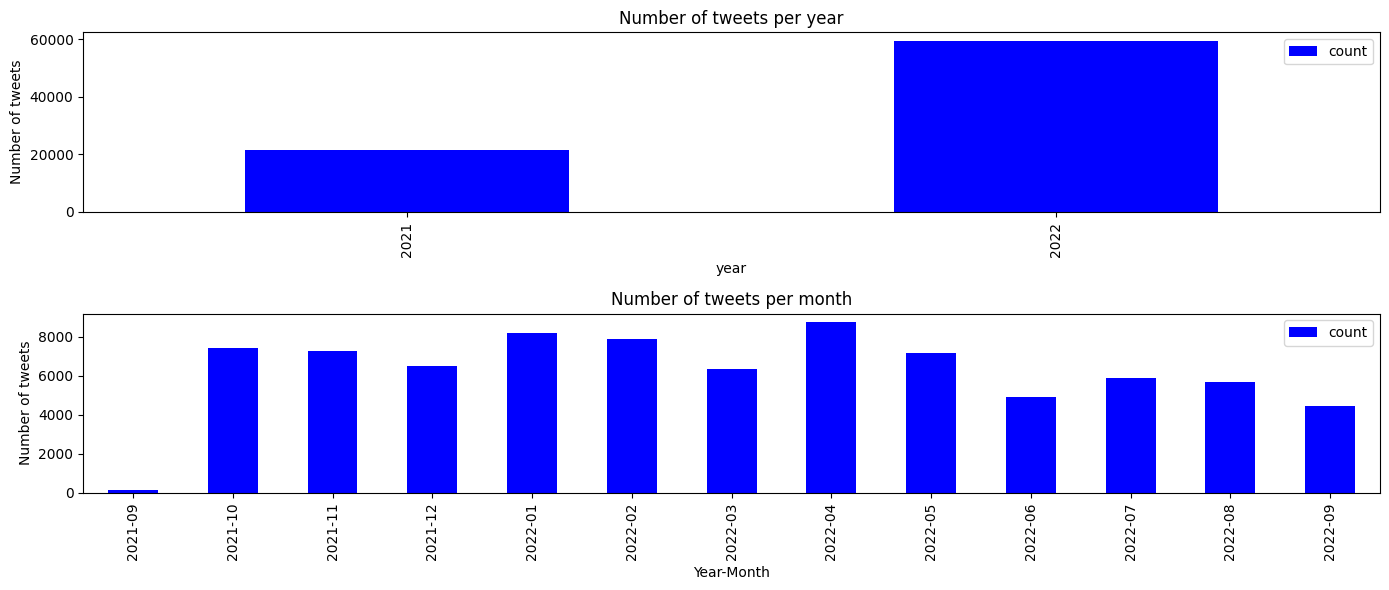

In [15]:
all_tweets['hour'] = all_tweets['Date'].dt.hour
all_tweets['day'] = all_tweets['Date'].dt.day
all_tweets['month'] = all_tweets['Date'].dt.month
all_tweets['year'] = all_tweets['Date'].dt.year
all_tweets['dayofweek'] = all_tweets['Date'].dt.dayofweek

# Plot the number of tweets per year
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))
all_tweets['year'].value_counts().sort_index().plot(ax=axes[0], kind='bar', title='Number of tweets per year', color='blue', legend=True, ylabel='Number of tweets')

# Plot the number of tweets per month per year, basically sort the months in chronological order, so have 2021-9, 2021-10, 2021-11, all the way till the months of 2022, and add the number of tweets in each
all_tweets['year_month'] = all_tweets['year'].astype(str) + '-' + all_tweets['month'].astype(str).str.zfill(2)
all_tweets['year_month'].value_counts().sort_index().plot(ax=axes[1], kind='bar', title='Number of tweets per month', color='blue', legend=True, ylabel='Number of tweets')
axes[0].set_ylabel('Number of tweets')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Number of tweets')
plt.tight_layout()
plt.show()

### **Word Cloud of Tweets**

In this analysis, we visualized the most frequent words in the tweets dataset using a word cloud. To improve the clarity of the word cloud and remove common but unimportant words, we manually defined a set of stop words. These stop words include contractions and common functional words (e.g., "wasn't", "are", "she", "you" etc.) that do not provide significant insights into the sentiment or topic of the tweets.


#### **Conclusions**
* We find that https and links are among the most prevalent, which indicates that most tweets have links within the tweets. However, this harms the sentiment analysis process by adding noise within the dataset. 
* The names of stock are repeated, for instance Tesla and TSLA, or GOOG and GOOGL. The dataset is also case sensitive, which creates confusion in sentiment analysis.

During the [data preprocessing](data_preprocessing.ipynb):
* Emojis must be removed.
* Links must be removed.
* All tweets must be brought to lowercase.
* Multiple names of the stocks must be replaced by solely one.

Word cloud of entire database:


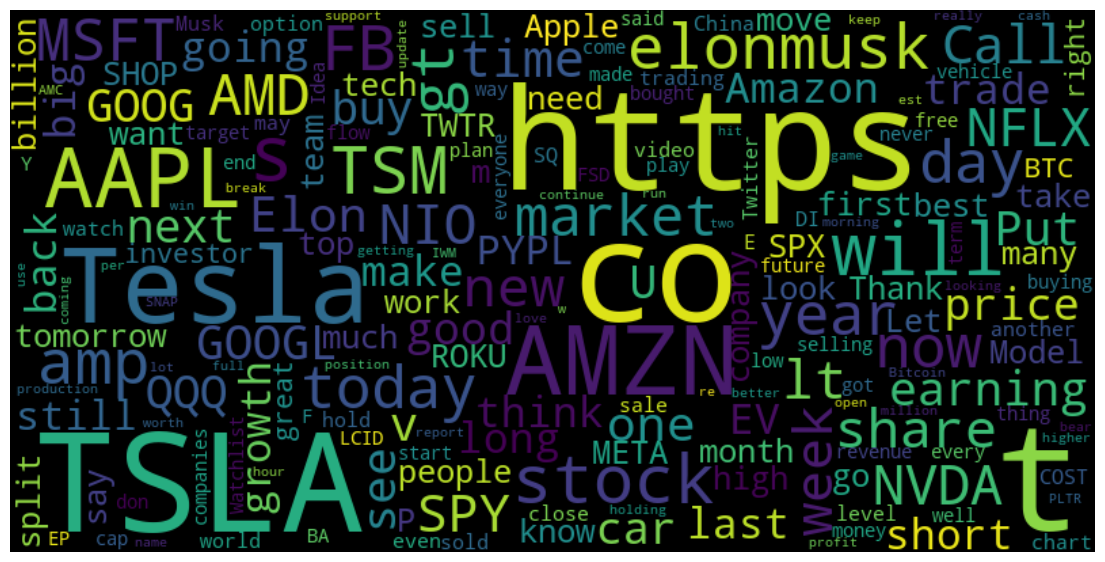

{"wasn't", "aren't", 'own', 'she', 'how', 'under', "you've", 'once', 'their', 'of', 'theirs', 'themselves', 'was', 'm', 'wasn', "mustn't", 're', 'just', "mightn't", 'don', 'on', 't', 'hasn', 'ours', 'yourself', 'which', 'to', 'do', "don't", 'herself', 'a', 'where', 'any', 'shouldn', 'than', 'mustn', 'hers', "you're", "weren't", 'during', 'our', 'those', 'couldn', 'not', 'most', 'didn', 'down', 'before', 'such', "needn't", 'few', 'itself', 'other', 'doesn', 'by', 'into', "that'll", 'this', 'll', 'were', "hadn't", 'his', 'mightn', 'against', 'in', 'i', 'my', 'what', 'doing', 'then', 'up', 've', 'if', 'no', 'about', 'for', 'more', 'further', 'haven', 'does', 'your', 'when', 'too', 'ourselves', 'shan', 'is', 'only', 'weren', 'while', 'should', 'wouldn', 'there', "won't", 'after', 'ain', 'or', 'him', 'off', "you'll", 'with', 'from', 'over', 'can', 'again', 'some', 'until', 'here', 'her', 'ma', "haven't", 'who', "isn't", "it's", 'same', 'now', 'has', 'each', "she's", 'had', 'and', 'why', 'wi

In [16]:
all_tweets_string = " ".join(all_tweets['Tweet'])
wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(all_tweets_string)
print('Word cloud of entire database:')
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

stop_words = set(stopwords.words('english'))
print(stop_words)


### **Volume of Tweets**
This analysis visualizes the distribution of tweets across the top 5 most mentioned companies in the dataset. By plotting the number of tweets for each stock, we can identify which companies received the most public attention during the time period under consideration. Furthermore, the 5 companies with the lowest amount of tweets were also printed, to highlight the stark contrast in volume of tweets.

#### **Conclusions**
* As mentioned before, Tesla has an overwhelmingly large amount of public discourse and attention, making it the best choice to choose to explore the impact of sentiment analysis on high discourse stocks.
* Ford merely has 31 tweets, making it a suitable choice to explore the impact of sentiment analysis on low discourse stocks.
* AAPL and AMZN are options for a medium amount of public discourse, not because they are close to the mean, but because they provide a middle ground between Ford and Tesla.

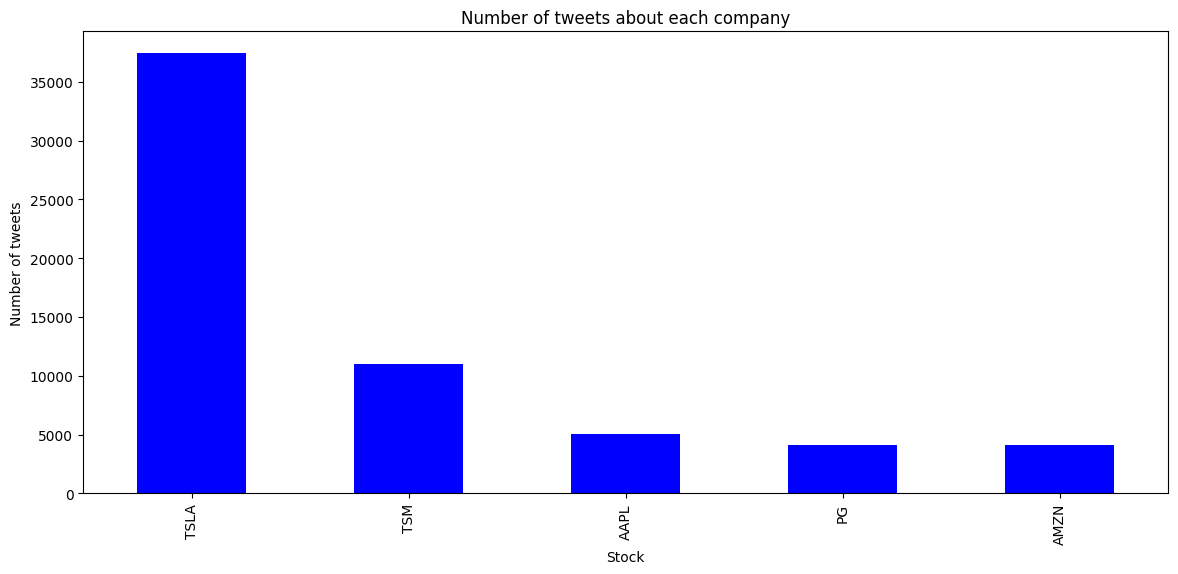

The 5 companies with the least public attention are:
Stock Name
NOC     31
F       31
BX      50
VZ     123
ZS     193
Name: count, dtype: int64


In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
all_tweets['Stock Name'].value_counts().head(5).plot(kind='bar', color='blue', ax=ax)
ax.set_title('Number of tweets about each company')
ax.set_xlabel('Stock')
ax.set_ylabel('Number of tweets')
plt.show()

least_mentioned_stocks = all_tweets['Stock Name'].value_counts().nsmallest(5)
print("The 5 companies with the least public attention are:")
print(least_mentioned_stocks)

### **Rudimentary Sentiment Analysis to identify distribution**
In this block, VADER (Valence Aware Dictionary sEntiment Reasoner) is used to perform rudimentary sentiment analysis on tweets. A manually curated dataset of labeled sentences (positive, negative, and neutral) serves as the training data. The last 20 sentences of the tweet dataset are classified into three sentiment categories: positive, negative, and neutral. These results are then visualized using a pie chart to showcase the distribution of sentiments.

#### **Inputs**
The variable `tweets_vol` determines how many tweets and sentences will be analyzed for sentiment. By default, this is set to 30, meaning the first 30 tweets are analyzed. You can change this value to analyze more or fewer tweets based on your needs.

#### **Conclusions**
* There are typically more positive tweets than negative and neutral tweets.
* Neutral tweets and negative tweets are evenly distributed.

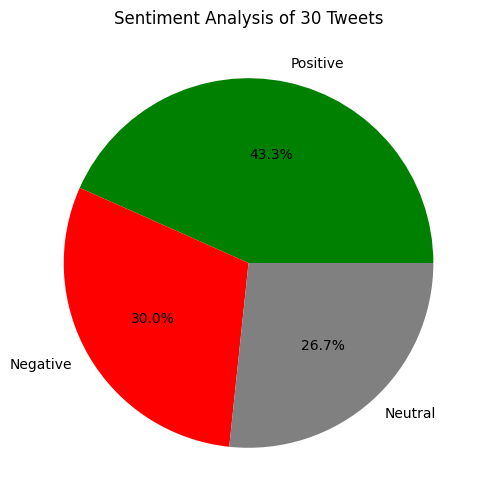

In [39]:
analyzer = SentimentIntensityAnalyzer()
sentiments = []
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []
tweets_vol= 30
for tweet in blob.sentences[:tweets_vol]:
    scores = analyzer.polarity_scores(str(tweet))
    if scores['compound'] >= 0.05:
        positive_sentiments.append(str(tweet))
        sentiments.append("positive")
    elif scores['compound'] <= -0.05:
        negative_sentiments.append(str(tweet))
        sentiments.append("negative")
    else:
        neutral_sentiments.append(str(tweet))
        sentiments.append("neutral")

sentiment_counts = pd.Series(sentiments).value_counts()

fig, ax = plt.subplots(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'], labels=['Positive', 'Negative', 'Neutral'], ax=ax)
ax.set_title(f"Sentiment Analysis of {tweets_vol} Tweets")
ax.set_ylabel("")  # Hide y-label for cleaner visualization
plt.show()

### **Correlation between Sentiment and Tweet Length**
To further explore the dataset, we examine the relationship between the sentiment of tweets and their respective lengths, focusing on the number of characters in each tweet. This analysis highlights a key finding: **Negative tweets tend to be longer than positive tweets** in terms of character count. This has been demonstrated through side-by-side box plots, displaying the 5-point summary (minimum, Q1, Median, Q3, maximum, IQR) of the length of the tweets.

---

#### **Key Observations:**
1. **Negative Tweets**:
   - Negative sentiments, especially in the context of a stock like TSLA (Tesla), often require more detailed explanations or justifications.
   - When expressing pessimism about stock price movements, people might elaborate on reasons for decline, market risks, or concerns about company performance.
   - Furthermore, as can be seen from the aforementioned pie chart, the majority of Tweets are positive about companies, meaning that going against the popular opinion requires more justification.
   - As a result, negative tweets tend to contain more elaborate content, leading to a higher character count.
   
2. **Positive Tweets**:
   - Positive sentiments are usually more concise, often focusing on a singular point of optimism or an argument supporting a rise in stock price.
   - Since the positive viewpoint typically involves optimism without needing extensive justification, these tweets tend to be shorter and more direct.

3. **Neutral Tweets:**
   - Neutral sentiments have the least character count of all the sentiments, as users who are neutral typically do not have strong opinions or substantial knowledge to elaborate on the subject.
   - These tweets are often brief, as they may contain observations without detailed analysis or strong viewpoints.
   - The neutral sentiment often reflects an absence of opinion or a balanced perspective, and as such, users expressing neutral views may not feel compelled to provide much justification, resulting in the shortest tweet lengths.

---

#### **Conclusion:**
The correlation between sentiment and tweet length suggests that **negative sentiments tend to be longer** because users often provide more reasoning and context for their pessimistic outlooks. On the other hand, **positive sentiments are usually shorter** since the optimistic viewpoint can be expressed succinctly without needing much elaboration.

This pattern is likely due to the nature of the sentiments themselves—negative tweets often require a more thorough explanation to support a cautious or critical outlook, while positive tweets can be delivered more directly. Furthermore, **neutral tweets have the least character count**, as individuals expressing neutral views may not feel the need to provide in-depth justification, often lacking strong opinions or knowledge on the subject matter.


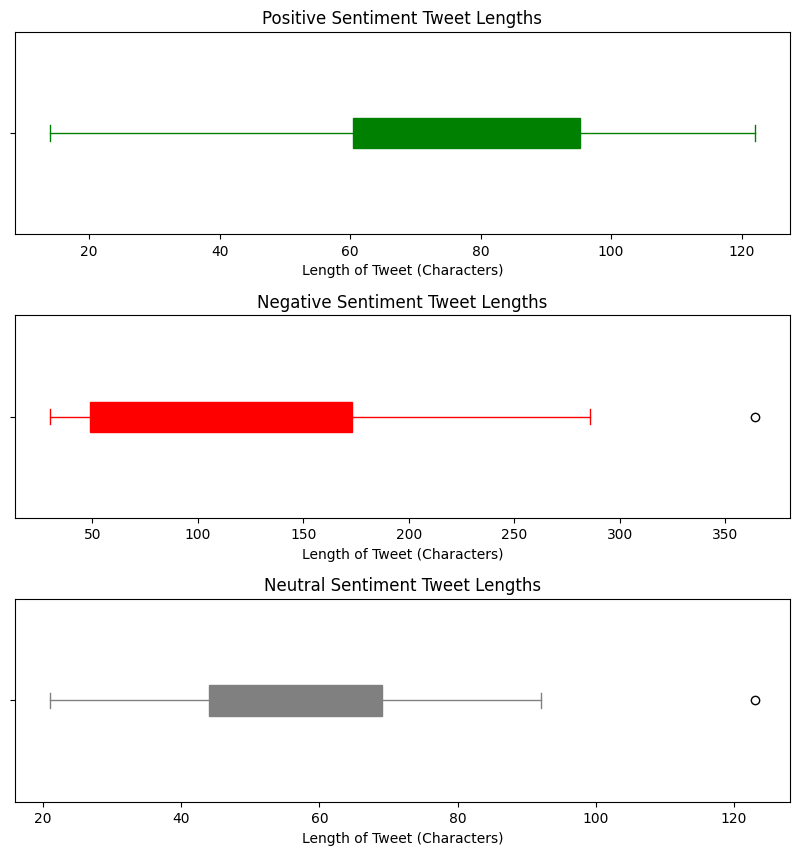

In [43]:
# Calculate the lengths of the tweets for each sentiment category
positive_series = pd.Series([len(sentiment) for sentiment in positive_sentiments])
negative_series = pd.Series([len(sentiment) for sentiment in negative_sentiments])
neutral_series = pd.Series([len(sentiment) for sentiment in neutral_sentiments])

# Create separate box plots for each sentiment in different rows
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))  # Adjusted size for smaller plots

# Plotting the box plots
positive_series.plot(kind='box', ax=axes[0], vert=False, patch_artist=True, color='green')
negative_series.plot(kind='box', ax=axes[1], vert=False, patch_artist=True, color='red')
neutral_series.plot(kind='box', ax=axes[2], vert=False, patch_artist=True, color='gray')

# Titles and labels
axes[0].set_title('Positive Sentiment Tweet Lengths')
axes[0].set_xlabel('Length of Tweet (Characters)')
axes[1].set_title('Negative Sentiment Tweet Lengths')
axes[1].set_xlabel('Length of Tweet (Characters)')
axes[2].set_title('Neutral Sentiment Tweet Lengths')
axes[2].set_xlabel('Length of Tweet (Characters)')

# Function to display 5-point summary (Q1, median, Q3, IQR, min/max) on the plot
def add_5point_summary(ax, series):
    Q1 = series.quantile(0.25)
    median = series.median()
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    min_val = series.min()
    max_val = series.max()

    # Annotating the values on the plot with labels
    ax.annotate(f'Q1: {Q1:.2f}', xy=(0.5, Q1), xytext=(10, 0), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')
    ax.annotate(f'Median: {median:.2f}', xy=(0.5, median), xytext=(10, 0), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')
    ax.annotate(f'Q3: {Q3:.2f}', xy=(0.5, Q3), xytext=(10, 0), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')
    ax.annotate(f'IQR: {IQR:.2f}', xy=(0.5, Q3), xytext=(10, -15), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')
    ax.annotate(f'Min: {min_val:.2f}', xy=(0.5, min_val), xytext=(10, 0), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')
    ax.annotate(f'Max: {max_val:.2f}', xy=(0.5, max_val), xytext=(10, 0), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

# Add 5-point summary to each plot
add_5point_summary(axes[0], positive_series)
add_5point_summary(axes[1], negative_series)
add_5point_summary(axes[2], neutral_series)

plt.subplots_adjust(hspace=0.4)
plt.show()